In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #turn off irrelevant scipy future warning 
import heartbeat as hb
import normalizer
import importlib
import random 
import time 
import pandas as pd 
import numpy as np
from collections import Counter
from scipy import signal
from scipy.signal import find_peaks, resample
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import gc
from os import listdir
from os.path import isfile, join
import sys

importlib.reload(hb)
importlib.reload(normalizer)

print('Packages Loaded')

Packages Loaded


In [2]:
print('Files in Directory {}:\n'.format(os.getcwd()+'/mit_data'))
print('-------------------------------\n')
onlyfiles = [f for f in listdir(os.getcwd()+'/mit_data') if isfile(join(os.getcwd()+'/mit_data', f))]
print(sorted(onlyfiles)[1:],'\n\n***',len(onlyfiles)-1,'data files ***')   

print('\nAll patients:\n',hb.all_patients())

Files in Directory /Users/Xing/code/medlink_ecg/ECG_Classification_Pytorch/mit_data:

-------------------------------

['100.csv', '100annotations.txt', '101.csv', '101annotations.txt', '102.csv', '102annotations.txt', '103.csv', '103annotations.txt', '104.csv', '104annotations.txt', '105.csv', '105annotations.txt', '106.csv', '106annotations.txt', '107.csv', '107annotations.txt', '108.csv', '108annotations.txt', '109.csv', '109annotations.txt', '111.csv', '111annotations.txt', '112.csv', '112annotations.txt', '113.csv', '113annotations.txt', '114.csv', '114annotations.txt', '115.csv', '115annotations.txt', '116.csv', '116annotations.txt', '117.csv', '117annotations.txt', '118.csv', '118annotations.txt', '119.csv', '119annotations.txt', '121.csv', '121annotations.txt', '122.csv', '122annotations.txt', '123.csv', '123annotations.txt', '124.csv', '124annotations.txt', '200.csv', '200annotations.txt', '201.csv', '201annotations.txt', '202.csv', '202annotations.txt', '203.csv', '203annotat

In [3]:
print("MIT DATABASES CONDITIONS:\n")
hb.classes_further
hb.most_common_conditions(patients=hb.all_patients(),top_k=8)

MIT DATABASES CONDITIONS:



[('N', 75052),
 ('L', 8075),
 ('R', 7259),
 ('V', 7130),
 ('/', 7028),
 ('A', 2546),
 ('+', 1291),
 ('f', 982)]

In [4]:
print('Specific_classes to be examined:\n')
classes= {0:'N',1:'L',2:'R',3:'V',4:'/',5:'A',6:'f',7:'F'}
print(classes,'\n')
for k,v in classes.items():
    print('Class {} condition: {}'.format(k+1,hb.classes_further[v]))

Specific_classes to be examined:

{0: 'N', 1: 'L', 2: 'R', 3: 'V', 4: '/', 5: 'A', 6: 'f', 7: 'F'} 

Class 1 condition: Normal beat
Class 2 condition: Left bundle branch block beat
Class 3 condition: Right bundle branch block beat
Class 4 condition: Premature ventricular contraction
Class 5 condition: Paced beat
Class 6 condition: Atrial premature beat
Class 7 condition: Fusion of paced and normal beat
Class 8 condition: Fusion of ventricular and normal beat


Generating_plot(s)...


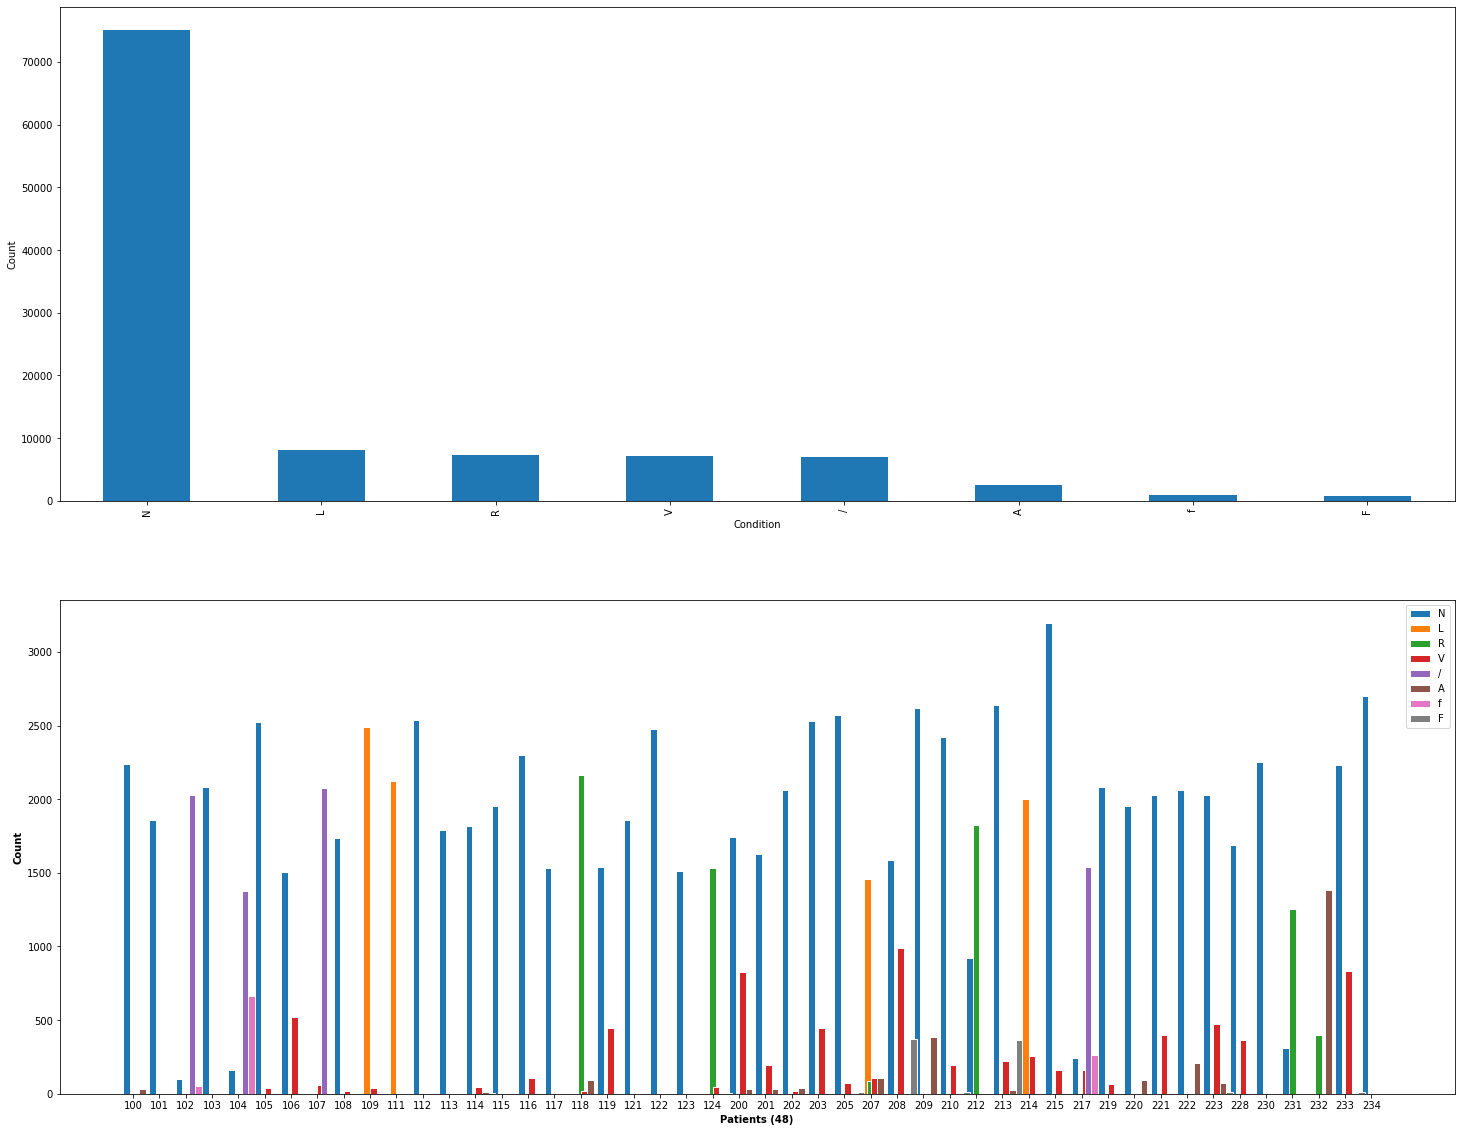

In [5]:
classes= {0:'N',1:'L',2:'R',3:'V',4:'/',5:'A',6:'f',7:'F'}
patient_dic=hb.distribution_bar(patients=hb.all_patients(),classes=classes)

In [6]:
classes= {0:'N',1:'S',2:'V',3:'F',4:'Q'}
classes_reducer={'N':['N','L','R','e','j'],
                 'S':['S','A','a','J'],'V':['V','E'],'F':['F'],'Q':['/','Q','f']}
for c, subclass in classes_reducer.items():
    print('For class:',c, '({})'.format(hb.classes_further[c]))
    for i in subclass:
        print("  ({})".format(i), hb.classes_further[i])

For class: N (Normal beat)
  (N) Normal beat
  (L) Left bundle branch block beat
  (R) Right bundle branch block beat
  (e) Atrial escape beat
  (j) Nodal (junctional) escape beat
For class: S (Supraventricular premature beat)
  (S) Supraventricular premature beat
  (A) Atrial premature beat
  (a) Aberrated atrial premature beat
  (J) Nodal (junctional) premature beat
For class: V (Premature ventricular contraction)
  (V) Premature ventricular contraction
  (E) Ventricular escape beat
For class: F (Fusion of ventricular and normal beat)
  (F) Fusion of ventricular and normal beat
For class: Q (Unclassifiable beat)
  (/) Paced beat
  (Q) Unclassifiable beat
  (f) Fusion of paced and normal beat


Generating_plot(s)...


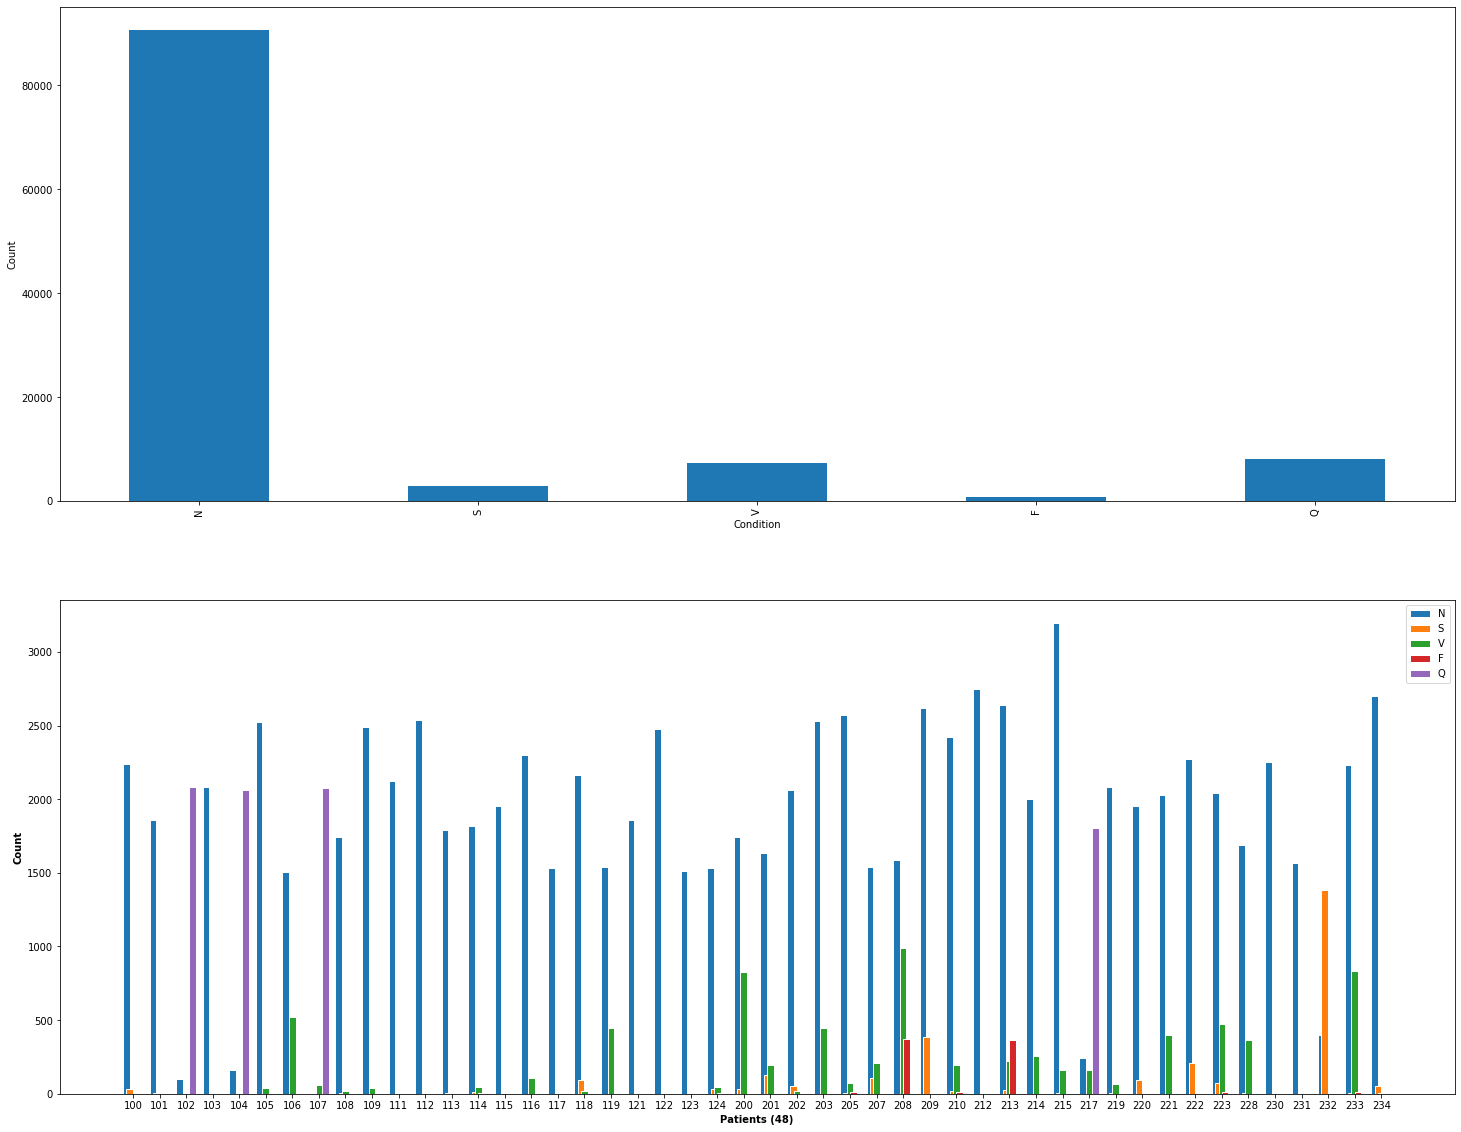

In [7]:
patient_dic=hb.distribution_bar(patients=hb.all_patients(),classes=classes,
                                classes_reducer=classes_reducer)

Generating_plot(s)...


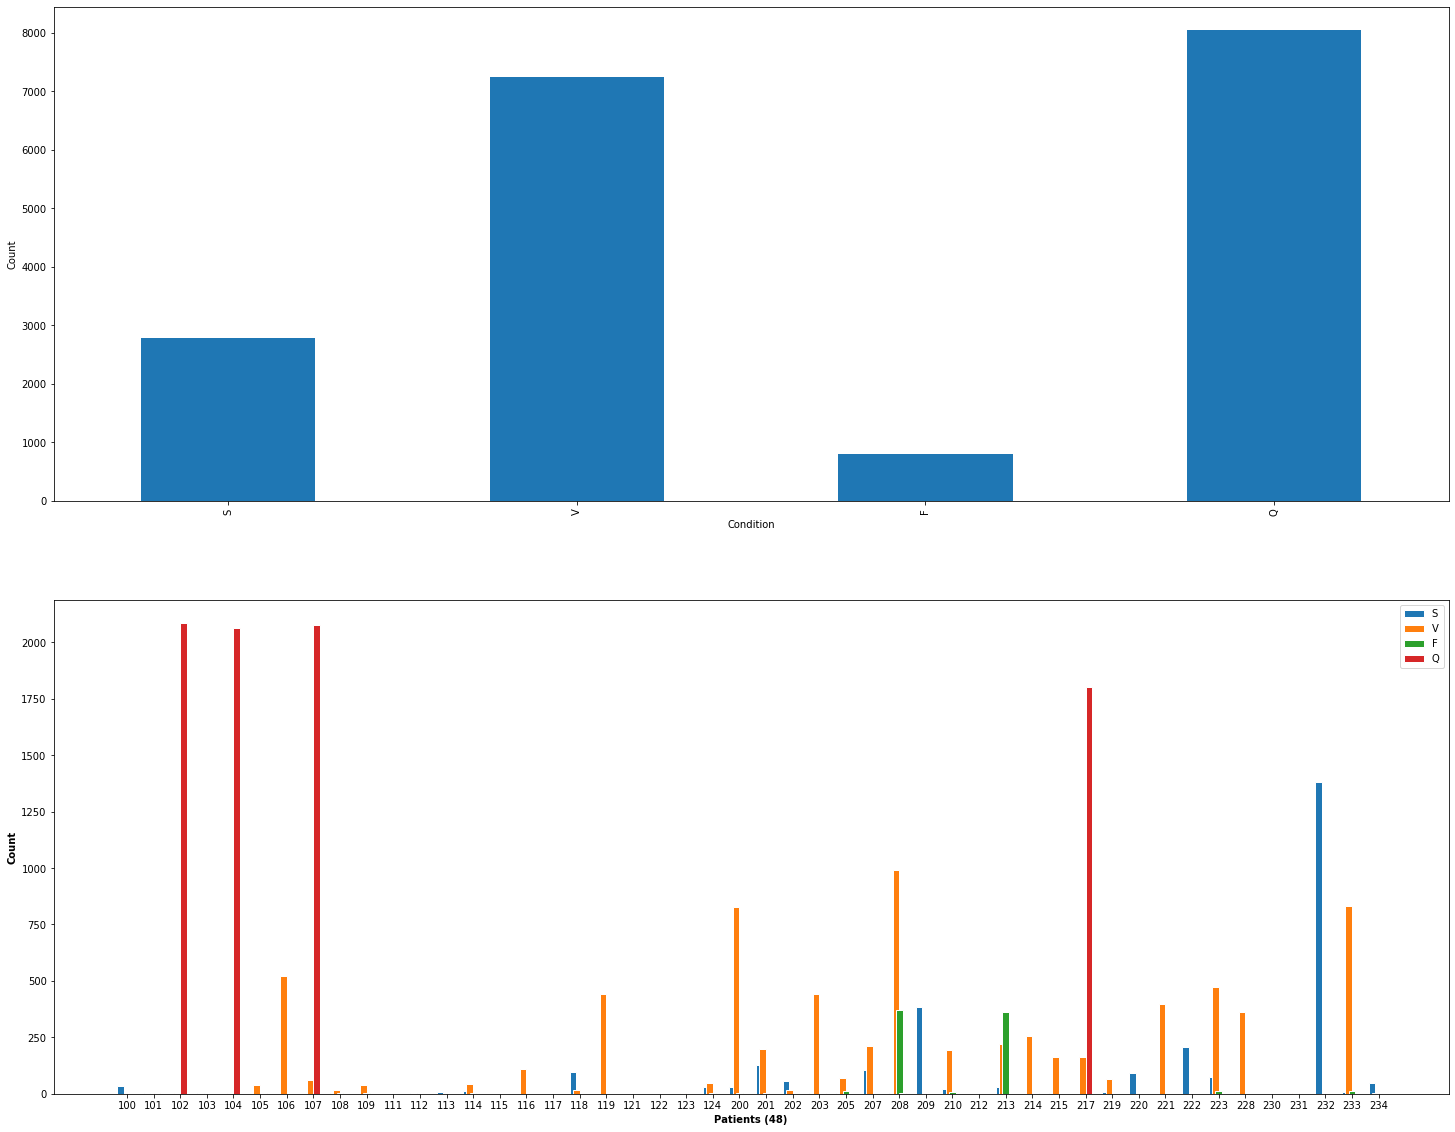

In [8]:
classes_wo_N= {0:'S',1:'V',2:'F',3:'Q'}
patient_dic=hb.distribution_bar(patients=hb.all_patients(),classes=classes_wo_N,
                                classes_reducer=classes_reducer)

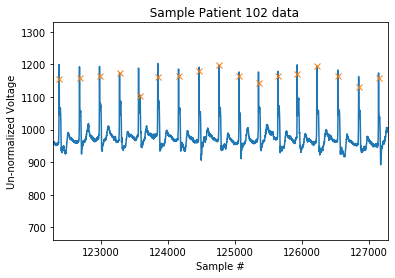

In [9]:
# patient=random.choice(hb.all_patients())
patient = 102
hb.get_patient_data(patient,norm=False,sample_plot=True)
plt.ylabel('Un-normalized Voltage')
plt.xlabel('Sample #')
plt.draw()

PATIENT: 115

Norm 1: Creates a mean of 0, and a std of 1
Norm 2: Creates a mean of 0, and y range from [-1 1]
Norm 3: Creates a y range from [0 1]


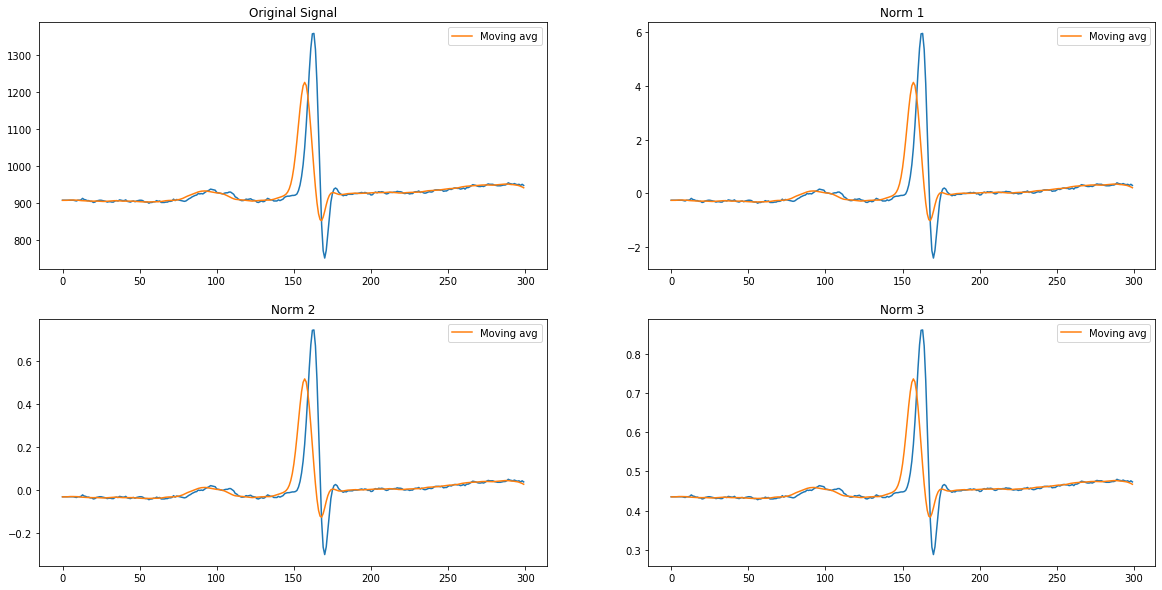

Selected Norm = 3


In [10]:
# for signal normalization
patient=random.choice(hb.all_patients())
patient
import numpy as np
import matplotlib.pyplot as plt
def compare(patient,length,window=10):
    print("PATIENT: {}\n".format(patient))
    sig,notes= hb.get_patient_data(patient,norm=False)
    m=hb.moving_average(sig,10)
    n = np.random.choice(10*length)
    plt.figure(figsize=(20,10))
    
    plt.subplot(221)
    plt.plot(sig[0:length])
    plt.plot(m[0:length],label='Moving avg')
    plt.legend()
    plt.title('Original Signal')
    
    
    print("Norm 1: Creates a mean of 0, and a std of 1")
    plt.subplot(222)
    plt.plot(normalizer.z_norm_b(sig)[0:length])
    m=hb.moving_average(normalizer.z_norm_b(sig),window)
    plt.plot(m[0:length],label='Moving avg')
    plt.legend()
    plt.title('Norm 1')
    
    print("Norm 2: Creates a mean of 0, and y range from [-1 1]")
    plt.subplot(223)
    plt.plot(normalizer.z_norm2(sig)[0:length])
    m=hb.moving_average(normalizer.z_norm2(sig),window)
    plt.plot(m[0:length],label='Moving avg')
    plt.legend()
    plt.title('Norm 2')

    
    print("Norm 3: Creates a y range from [0 1]")
    plt.subplot(224)
    plt.plot(normalizer.z_norm(sig)[0:length])
    m=hb.moving_average(normalizer.z_norm(sig),window)
    plt.plot(m[0:length],label='Moving avg')
    plt.legend()
    plt.title('Norm 3')
    plt.show()
    
compare(patient=patient,length=300)
print('Selected Norm = 3')

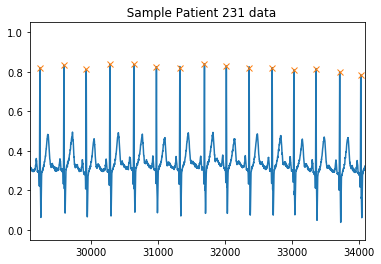

In [11]:
hb.get_patient_data(patient=231,norm=True,sample_plot=True)

/home/ps/anaconda3/envs/torch-env/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


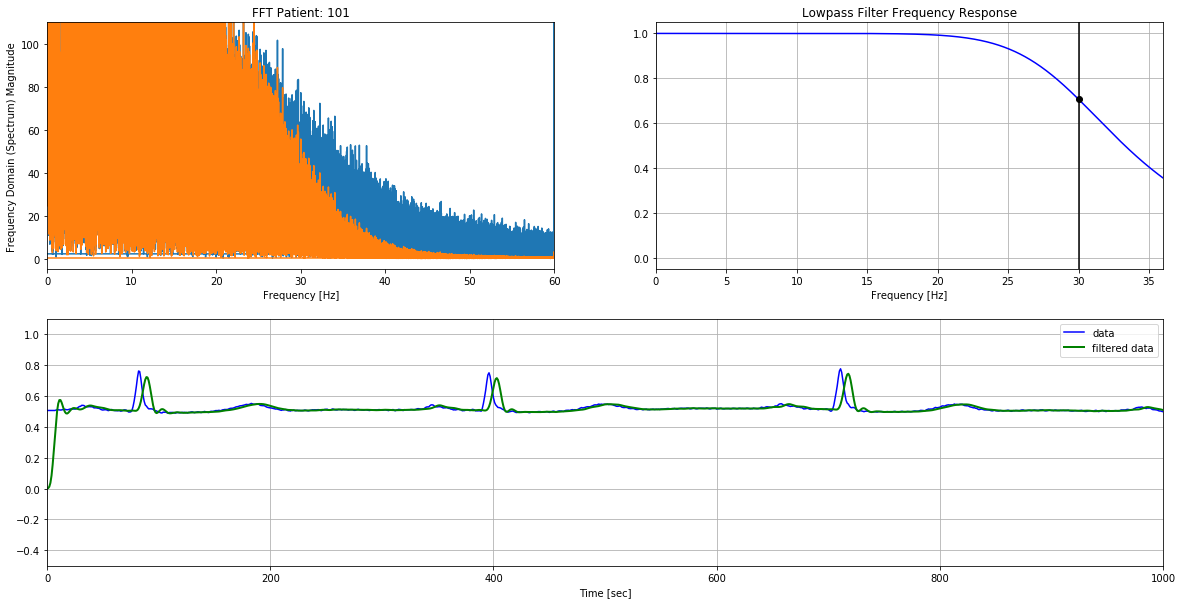

In [12]:
from normalizer import filt  #class of various filteration functions 
patient= random.choice(hb.all_patients())
filt().low_pass_filter_plot(patient=patient,cutoff=30,fs=360)

Examining 48 patients...
Percent: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100.00% Done...

Padding...


Average HR Sample Len: 284.39 samples (0.79s per beat)
Average HR: 80.61 bpm
Plotting...



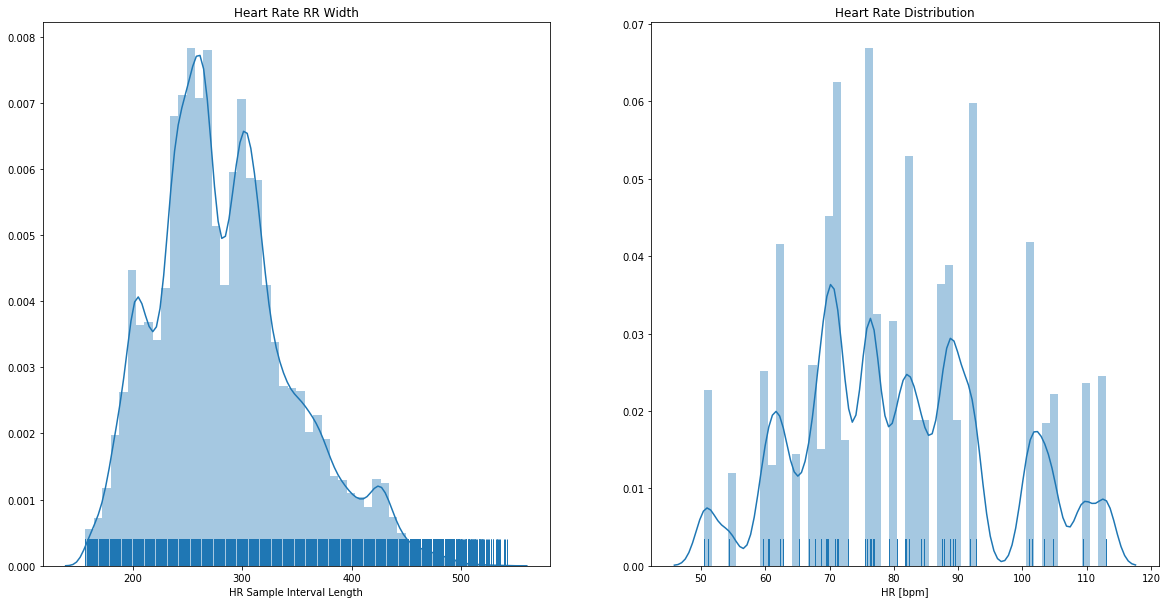

Data Loaded | Shape:(107726, 542)

    89696 cases of Normal beat

    2388 cases of Supraventricular premature beat

    6827 cases of Premature ventricular contraction

    8028 cases of Unclassifiable beat

    787 cases of Fusion of ventricular and normal beat

3.42min Runtime


In [13]:
#isolation algorithim heart beat data 
# patients_list = [101,102,103]
patients_list = hb.all_patients()
X,y,isolated_beat= hb.isolate_patient_data(patients=patients_list,classes=classes,
                    classes_further=hb.classes_further, classes_reducer=classes_reducer, 
                     min_HR= 40,max_HR= 140,fs=360,verbose=False,plot_figs=True)

In [14]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("sample y vals:: [patient#, HR, Condition Class]:",y[0])

X shape: (107726, 539)
y shape: (107726, 3)
sample y vals:: [patient#, HR, Condition Class]: ['100' '75.536676138855' 'N']


MAX HB TIME: 1.4972222222222222


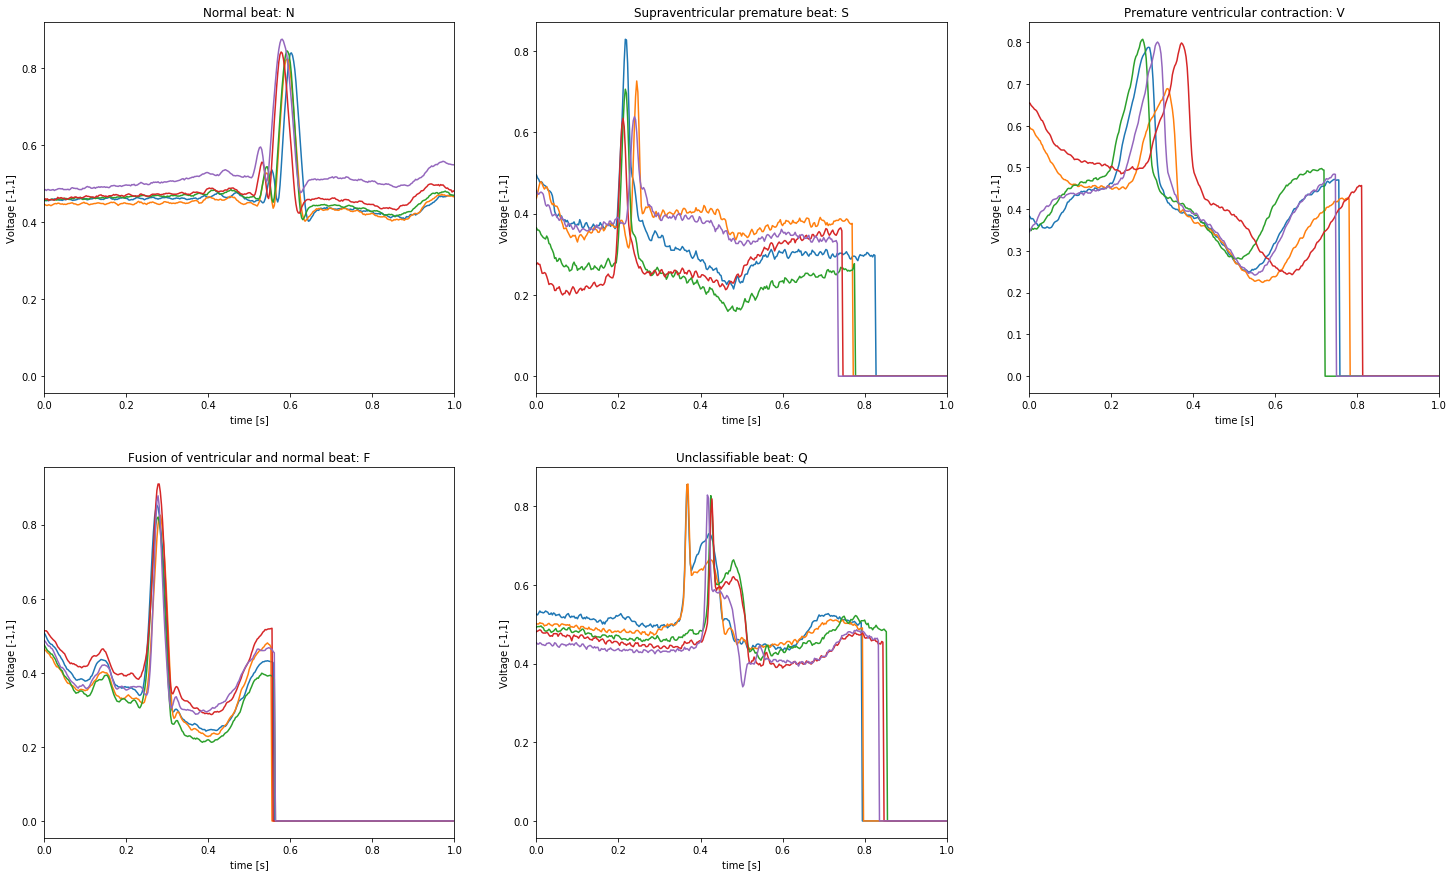

In [15]:
hb.show_sample_plots(X=X,y=y,classes=classes,classes_further=hb.classes_further,plot_xlim=1,dims=[2,3])

Resampling...

X_resamp shape: (107726, 187)
y shape: (107726, 3)
MAX HB TIME: 0.5194444444444445


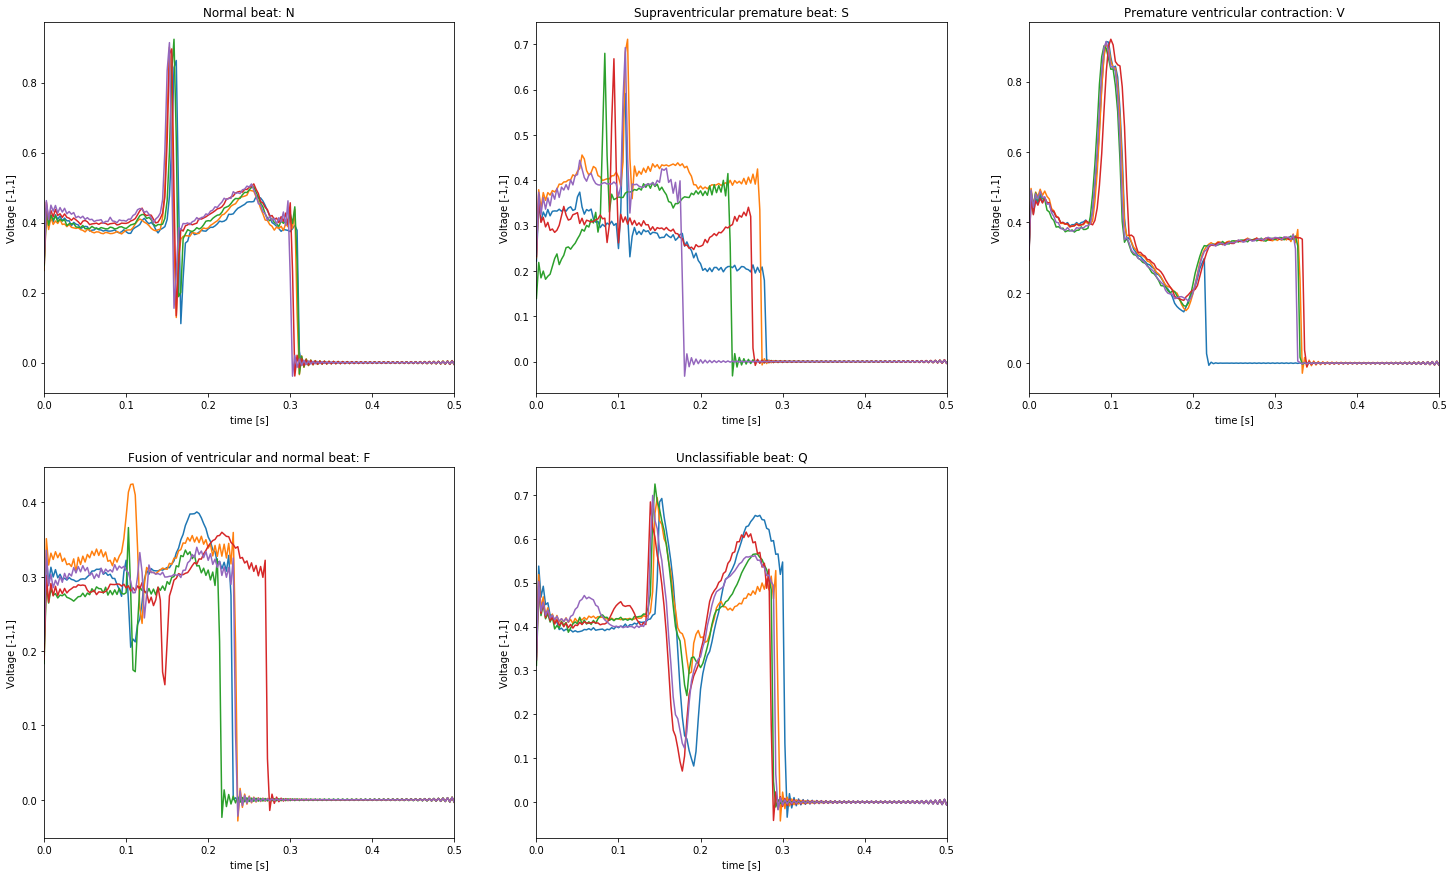

In [16]:
# Cut Roughly in Half 
print('Resampling...\n')
X_resamp=hb.resample_vals(X,samp_len=187)
print("X_resamp shape:", X_resamp.shape)
print("y shape:", y.shape)
hb.show_sample_plots(X=X_resamp,y=y,classes=classes,classes_further=hb.classes_further,
                     plot_xlim=.5,dims=[2,3])

In [17]:
# clean memorry
# del X,isolated_beat
# gc.collect()

In [18]:
base_dir = os.getcwd()+'/torch_train/'
base_dir

'/Users/Xing/code/medlink_ecg/ECG_Classification_Pytorch/torch_train/'

In [19]:
#     os.mkdir(base_dir)
pd.DataFrame(X_resamp).to_csv(base_dir + 'X_resamp.csv')
pd.DataFrame(y).to_csv(base_dir + 'y.csv')

In [20]:

# if not os.path.exists(base_dir + 'X_resamp.csv'):
#     os.mkdir(base_dir)
#     pd.DataFrame(X_resamp).to_csv(base_dir + 'X_resamp.csv')
#     pd.DataFrame(y).to_csv(base_dir + 'y.csv')
# else:
#     X_resamp = pd.read_csv(base_dir + 'X_resamp.csv')
#     y = pd.read_csv(base_dir + 'y.csv')

In [21]:
X_resamp.shape

(107726, 187)

In [22]:
# start deep learning

In [23]:
classes={0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
print('X (resampled):',X_resamp.shape,'y:',y.shape,'Classes:',classes)

def get_key(val,my_dict): 
    """
    Simple Function to Get Key 
    in Dictionary from val. 
    
    Input: Key, Dictionary 
    Output: Val
    
    """
    for key, value in my_dict.items(): 
         if val == value: 
            return key 
    return "key doesn't exist"

def one_hot(c,classes=classes):
    """
    Simple one hot encoding for the 
    types of arrthymia conditions. 
    
    class --> encode class
    'N' --> [1, 0, 0, 0, 0, 0, 0, 0]
    
    c:: current class of the object
    classes:: classes dictionary 
        
    """
    enc=np.zeros(len(classes),dtype=int).tolist()
    enc[get_key(c,classes)]= 1
    return enc
  
all_patients=['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121',
              '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', 
              '222', '223', '228', '230', '231', '232', '233', '234']

X (resampled): (107726, 187) y: (107726, 3) Classes: {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}


In [24]:
from sklearn.utils import shuffle
def get_train_test(X,y,train_size,classes=classes,patients=all_patients):
  """
  Get train and test function for spliting ensuring testing has all classes
  preseting for testing/eval to see how well all classes are performing. 
  """

  sub_c={}
    
 
  for c in classes:
      C = np.argwhere(y[:,2] == list(classes.values())[c]).flatten()

      sub_c[c]=np.random.choice(C,int((C.shape[0]- C.shape[0]*train_size)))

  X_test = np.vstack([X[sub_c[0]], X[sub_c[1]], X[sub_c[2]], X[sub_c[3]], X[sub_c[4]]])
  y_test = np.vstack([y[sub_c[0]], y[sub_c[1]], y[sub_c[2]], y[sub_c[3]], y[sub_c[4]]])

  deletions=[]
  for i in range(len(sub_c)):
    deletions.extend(sub_c[i].tolist())
  
  X_train = np.delete(X, deletions, axis=0)
  y_train = np.delete(y, deletions, axis=0)

  X_train, y_train = shuffle(X_train, y_train, random_state=0)
  X_test, y_test = shuffle(X_test, y_test, random_state=0)
  y_train= np.array([get_key(y_i,classes) for y_i in y_train[:,2]])
  y_test= np.array([get_key(y_i,classes) for y_i in y_test[:,2]])
  return X_train,y_train,X_test,y_test

  

X_train,y_train,X_test,y_test=get_train_test(X=X_resamp,y=y,train_size=.80)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

/home/ps/anaconda3/envs/torch-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


X_train: (88232, 187)
y_train: (88232,)
X_test: (21543, 187)
y_test: (21543,)


In [25]:
import warnings
from torch.utils.data.sampler import WeightedRandomSampler
import torch
from torch import optim 
import random
import torch.utils.data
from torch.utils.data.sampler import SubsetRandomSampler
import random
from torch.autograd import Variable

def imbalanced_loader(X_train,y_train,X_test,y_test,valid_size=.05,batch_size=512): # Split train into train + validation 
    """
    Get trainloader, validloader, and testloader for model training. This 
    creates equal training batches but naturally balanced validation and testing 
    sets. Note the testing set was previously augmented to get better per class metrics 
    
    Outputs: dataloader + testloader, where dataloader =  {"train": trainloader, "val": validloader}

    """
    warnings.filterwarnings("ignore") #torch bug
    print ('Getting Data... {}% Validation Set\n'.format(int(np.around(valid_size*100))))
    
    num_train = len(X_train)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]
    
    print("Batch Size:",batch_size)

    print('\nTrain Len=',len(train_idx),', Validation Len=',len(valid_idx), 'Test Len=',len(y_test))
                                                                                        
  
    class_sample_count = np.array([len(np.where(y_train[[train_idx]]==t)[0]) for t in np.unique(y_train[[train_idx]])])
    weight = 1. / class_sample_count
    samples_weight = np.array([weight[t] for t in y_train[[train_idx]]])
    samples_weight = torch.from_numpy(samples_weight)
    train_sampler = WeightedRandomSampler(torch.tensor(samples_weight,dtype=torch.double), len(samples_weight))
    trainDataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_train[[train_idx]]), torch.LongTensor(y_train[[train_idx]].astype(int)))
    train_sampler= torch.utils.data.BatchSampler(sampler=train_sampler, batch_size=batch_size, drop_last=True)
    trainloader = torch.utils.data.DataLoader(dataset = trainDataset, batch_size=batch_size, num_workers=1, sampler= train_sampler)
  
    
    valDataset = torch.utils.data.TensorDataset(torch.FloatTensor(X_train[[valid_idx]]), torch.LongTensor(y_train[[valid_idx]].astype(int)))
    sampler = torch.utils.data.RandomSampler(valDataset)
    sampler= torch.utils.data.BatchSampler(sampler, batch_size, drop_last=True)
    validloader = torch.utils.data.DataLoader(dataset = valDataset, batch_size=batch_size, num_workers=1,sampler=sampler)


    testset=[]
    for i,x in enumerate(X_test):
        testset.append((torch.from_numpy(x),torch.tensor([y_test[i]])))
    
    #testloader = torch.utils.data.DataLoader(dataset = testDataset, batch_size=batch_size, shuffle=False, num_workers=1) 
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                           shuffle=False, num_workers=1)

    print("")
    dataloader = {"train": trainloader, "val": validloader}
    print('Train Size Batched=',int(len(dataloader['train'].dataset)/batch_size),', Validation Size Batched=',int(len(dataloader['val'].dataset)/batch_size),', Test Size Batched=',len(testloader))
    
    
    warnings.resetwarnings()
    return dataloader,testloader
  
batch_size=512
dataloader,testloader = imbalanced_loader(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test, valid_size=.05,batch_size=batch_size)

Getting Data... 5% Validation Set

Batch Size: 512

Train Len= 83821 , Validation Len= 4411 Test Len= 21543

Train Size Batched= 163 , Validation Size Batched= 8 , Test Size Batched= 43


In [26]:
for hb,labels in dataloader['train']:
    for hb_index,label in enumerate(labels):
        print(hb_index,hb[hb_index].size(),label.cpu().numpy().shape,Counter(label.cpu().numpy().flatten()))

0 torch.Size([512, 187]) (512,) Counter({0: 117, 4: 107, 1: 99, 3: 95, 2: 94})
1 torch.Size([512, 187]) (512,) Counter({1: 119, 0: 108, 3: 99, 2: 96, 4: 90})
2 torch.Size([512, 187]) (512,) Counter({4: 113, 0: 109, 3: 102, 1: 101, 2: 87})
3 torch.Size([512, 187]) (512,) Counter({2: 106, 0: 106, 1: 101, 4: 100, 3: 99})
4 torch.Size([512, 187]) (512,) Counter({1: 118, 0: 110, 3: 101, 4: 93, 2: 90})
5 torch.Size([512, 187]) (512,) Counter({1: 114, 0: 107, 4: 103, 3: 95, 2: 93})
6 torch.Size([512, 187]) (512,) Counter({4: 108, 2: 106, 1: 101, 3: 99, 0: 98})
7 torch.Size([512, 187]) (512,) Counter({4: 113, 1: 110, 0: 104, 2: 100, 3: 85})
8 torch.Size([512, 187]) (512,) Counter({1: 114, 4: 109, 2: 101, 3: 96, 0: 92})
9 torch.Size([512, 187]) (512,) Counter({0: 112, 3: 112, 4: 104, 2: 102, 1: 82})
10 torch.Size([512, 187]) (512,) Counter({1: 118, 0: 107, 4: 106, 2: 92, 3: 89})
11 torch.Size([512, 187]) (512,) Counter({0: 111, 2: 110, 4: 108, 1: 97, 3: 86})
12 torch.Size([512, 187]) (512,) Cou

In [31]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

# print("""\nA 1D CNN is very effective when you expect to derive interesting features from shorter 
# (fixed-length) segments of the overall data set and where the location of the feature 
# within the segment is not of high relevance.\n""")

# class Anomaly_Classifier(nn.Module):
#     def __init__(self, input_size,num_classes):
#         super(Anomaly_Classifier, self).__init__()
    
#         self.conv= nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=5,stride=1)
        
#         self.conv_pad = nn.Conv1d(in_channels=32, out_channels=32, kernel_size=5,stride=1,padding=2)
#         self.drop_50 = nn.Dropout(p=0.5)

#         self.maxpool = nn.MaxPool1d(kernel_size=5,stride=2) 

#         self.dense1 = nn.Linear(32 * 8, 32) 
#         self.dense2 = nn.Linear(32, 32) 
        
#         self.dense_final = nn.Linear(32, num_classes)
#         self.softmax= nn.LogSoftmax(dim=1)

#     def forward(self, x):
#         residual= self.conv(x)
      
#         #block1 
#         x = F.relu(self.conv_pad(residual))
#         x = self.conv_pad(x)
#         x+= residual 
#         x = F.relu(x)
#         residual = self.maxpool(x) #[512 32 90]
       
#         #block2
#         x=F.relu(self.conv_pad(residual))
#         x=self.conv_pad(x)
#         x+=residual
#         x= F.relu(x)
#         residual = self.maxpool(x) #[512 32 43]
        
        
#         #block3
#         x=F.relu(self.conv_pad(residual))
#         x=self.conv_pad(x)
#         x+=residual
#         x= F.relu(x)
#         residual = self.maxpool(x) #[512 32 20]
        
        
#         #block4
#         x=F.relu(self.conv_pad(residual))
#         x=self.conv_pad(x)
#         x+=residual
#         x= F.relu(x)
#         x= self.maxpool(x) #[512 32 8]
        
#         #MLP
#         _,sc,sr = x.shape
#         x = x.view(-1, sc * sr)  # Reshape (current_dim)
#         # x = x.view(-1, 32 * 8)  # Reshape (current_dim, 32*2)
#         self.dense = nn.Linear(sc*sr,32).cuda()
#         x = self.dense(x)
#         x = F.relu(x)
        
# #         x = x.view(-1, 32 * 8) #Reshape (current_dim, 32*2) #ori
# #         x = F.relu(self.dense1(x))  #ori
#         #x = self.drop_60(x)
#         x= self.dense2(x)
#         x = self.softmax(self.dense_final(x))
#         return x
      
# print('Model Architecture Init\n')

# print("OPTIMIZER = optim.Adam(anom_classifier.parameters(),lr = 0.001) \n ")

cuda:0

A 1D CNN is very effective when you expect to derive interesting features from shorter 
(fixed-length) segments of the overall data set and where the location of the feature 
within the segment is not of high relevance.

Model Architecture Init

OPTIMIZER = optim.Adam(anom_classifier.parameters(),lr = 0.001) 
 


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class Anomaly_Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Anomaly_Classifier, self).__init__()

        self.conv = nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=5, stride=1)

        self.conv_pad = nn.Conv1d(in_channels=32, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.drop_50 = nn.Dropout(p=0.5)

        self.maxpool = nn.MaxPool1d(kernel_size=5, stride=2)

        # self.dense1 = nn.Linear(32 * 8, 32)
        self.dense2 = nn.Linear(32, 32)

        self.dense_final = nn.Linear(32, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        # self.softmax = nn.LogSoftmax()
        # self.softmax = nn.Softmax

    def forward(self, x):
        residual = self.conv(x)

        # block1
        x = F.relu(self.conv_pad(residual))
        x = self.conv_pad(x)
        x += residual
        x = F.relu(x)
        residual = self.maxpool(x)  # [512 32 90]

        # block2
        x = F.relu(self.conv_pad(residual))
        x = self.conv_pad(x)
        x += residual
        x = F.relu(x)
        residual = self.maxpool(x)  # [512 32 43]

        # block3
        x = F.relu(self.conv_pad(residual))
        x = self.conv_pad(x)
        x += residual
        x = F.relu(x)
        residual = self.maxpool(x)  # [512 32 20]

        # block4
        x = F.relu(self.conv_pad(residual))
        x = self.conv_pad(x)
        x += residual
        x = F.relu(x)
        x = self.maxpool(x)  # [512 32 8]

        # MLP
        _,sc,sr = x.shape
        x = x.view(-1, sc * sr)  # Reshape (current_dim)
        # x = x.view(-1, 32 * 8)  # Reshape (current_dim, 32*2)
        self.dense = nn.Linear(sc*sr,32).cuda()
        x = self.dense(x)
        x = F.relu(x)
        # x = self.drop_60(x)
        x = self.dense2(x)
        x = self.dense_final(x)
        x = self.softmax(x)  # actually logsoftmax, should all minus values.
        return x

cuda:0


In [28]:
# input_tensor = torch.autograd.Variable(torch.rand(100,1,512)).cuda()
# model = Anomaly_Classifier(input_size= 1, num_classes= 5).cuda()
# y=model(input_tensor)

In [29]:
import matplotlib.pyplot as plt 
import torch.optim as optim
import time 
import sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools


def reset_weights(model):
  """
  model.apply(reset_weights) will reset all the model parameters.
  This way the model is not overwhelmed 
  
  """
  if isinstance(model, nn.Conv1d) or isinstance(model, nn.Linear):
      model.reset_parameters()
      
def calc_accuracy(output,Y):
  
    # get acc_scores during training 
    max_vals, max_indices = torch.max(output,1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
  
def train_model(data_loader, model, criterion,optimizer, n_epochs=100,print_every=10,verbose=True,plot_results=True,validation=True):
  
  """
  Model Training Function.
  Input:
    
    Dataloader: {'train':trainloader,'val':validloader} --> If no validation is used set Validation = False & dataloader= {'train':trainloader}
    model: model.cuda() if gpu will be used, else cpu
    print_every: print every n epochs 
    verbose: print out results per epoch 
    plot_results: plot the train and valid loss 
    validation: is validation set in dataloader
  
  Output:
  
    trained classifier 
  
  """

  losses=[]
  start= time.time()
  print('Training for {} epochs...\n'.format(n_epochs))
  for epoch in range(n_epochs):
      if verbose == True and epoch % print_every== 0:
        print('\n\nEpoch {}/{}:'.format(epoch+1, n_epochs))
        
      if validation == True: 
        evaluation=['train', 'val']
      else:
        
        evaluation=['train']
        
      # Each epoch has a training and validation phase
      for phase in evaluation:
          if phase == 'train': 
              model.train(True)  # Set model to training mode
          else:
              model.train(False)  # Set model to evaluate mode

          running_loss = 0.0

          # Iterate over data.
          for hb,labels in data_loader[phase]:
            for hb_index,label in enumerate(labels):
#                 print(hb[hb_index].size(),label.cpu().numpy().shape,Counter(label.cpu().numpy().flatten()))
                HB, label = hb[hb_index].unsqueeze(1).cuda(), label.cuda()
                # forward + backward + optimize
                outputs = model(HB)
#                 print(outputs)
                acc= calc_accuracy(outputs,label)
                loss = criterion(outputs, label)#loss function 
                # zero the parameter (weight) gradients
                optimizer.zero_grad()

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    # update the weights
                    optimizer.step()

                # print loss statistics
                running_loss += loss.item()

            losses.append(running_loss) 

          if verbose == True and epoch % print_every== 0: 
            print('{} loss: {:.4f} | acc: {:.4f}|'.format(phase, running_loss,acc), end=' ')
  if verbose == True:        
    print('\nFinished Training  | Time:{}'.format(time.time()-start))
  if plot_results == True:
    plt.figure(figsize=(10,10))
    plt.plot(losses[0::2],label='train_loss')
    if validation == True:
      plt.plot(losses[1::2],label='validation_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.draw()
  
  return model 



def evaluate(testloader, trained_model,verbose= True):
  """
  Evaluation Metric Platfrom. Feed in the trained model 
  and test loader data. 
  
  Returns classification metric along with 
  predictions,truths
  
  """
  
  truth=[]
  preds=[]
  for hb,label in testloader:
      HB, label = hb.float().unsqueeze(1).cuda(), label.cuda()
      print(HB.size())
      outputs = trained_model(HB)
      _, predicted = torch.max(outputs, 1)
      print(predicted.size())
      preds.append(predicted.cpu().numpy().tolist())
      truth.append(label.cpu().numpy().tolist())
  
  preds_flat = [item for sublist in preds for item in sublist]
  truth_flat = [item for sublist in truth for item in sublist] 
 

  if verbose == True:
    print('\nEvaluating....')
    print("TEST ACC:",accuracy_score(truth_flat,preds_flat))
    print(classification_report(truth_flat,preds_flat))
  
  return preds_flat,truth_flat



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    
def get_kernel_size(n_h,k_h,n_w,k_w,p_h=0,s_h=1,p_w=0,s_w=1):
    """
    Kernel Measuring Function 
    """
    return [int((n_h-k_h+p_h+s_h)/s_h),int((n_w-k_w+p_w+s_w)/s_w)]    
    
    
def variation(n_epochs,num_iters=5):
  p=[]
  t=[]
  accuracy_scores=[]
  for i in range(num_iters):
    print('\nModel {}/{}...\n'.format(i+1,num_iters))
    Anomaly_Classifier(input_size=1,num_classes= 5).cuda().apply(reset_weights)
    print('Weights Reset')
    anom_classifier= Anomaly_Classifier(input_size=1,num_classes= 8).cuda()
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(anom_classifier.parameters(),lr = 0.001) 
    trained_classifier= train_model(data_loader=dataloader, model=anom_classifier,
                                    criterion = criterion,optimizer = optimizer ,
                                    n_epochs=n_epochs,print_every=1,verbose=False,plot_results=False, 
                                    validation=True)
    
    preds,truth = evaluate(testloader=testloader, trained_model = trained_classifier,verbose=False)
    t.append(truth)
    p.append(preds)
    print(accuracy_score(truth,preds))
    accuracy_scores.append(accuracy_score(truth,preds))
  return p,t,accuracy_scores
print('Functions Ready')

Functions Ready


/home/ps/anaconda3/envs/torch-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Weights Reset
Training for 100 epochs...



Epoch 1/100:
train loss: 261.4354 | acc: 0.2168| val loss: 12.6218 | acc: 0.1191| 

Epoch 11/100:
train loss: 102.8779 | acc: 0.7871| val loss: 7.2175 | acc: 0.4121| 

Epoch 21/100:
train loss: 86.3795 | acc: 0.8633| val loss: 5.9974 | acc: 0.8086| 

Epoch 31/100:
train loss: 60.8737 | acc: 0.8672| val loss: 4.9773 | acc: 0.8496| 

Epoch 41/100:
train loss: 81.8114 | acc: 0.8242| val loss: 6.7721 | acc: 0.3535| 

Epoch 51/100:
train loss: 55.9737 | acc: 0.9141| val loss: 4.4588 | acc: 0.8223| 

Epoch 61/100:
train loss: 45.1300 | acc: 0.8945| val loss: 3.7997 | acc: 0.8848| 

Epoch 71/100:
train loss: 41.2690 | acc: 0.9277| val loss: 5.9683 | acc: 0.4922| 

Epoch 81/100:
train loss: 51.0827 | acc: 0.9121| val loss: 4.5119 | acc: 0.7969| 

Epoch 91/100:
train loss: 43.4145 | acc: 0.9199| val loss: 4.3828 | acc: 0.7812| 
Finished Training  | Time:205.78780937194824
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size

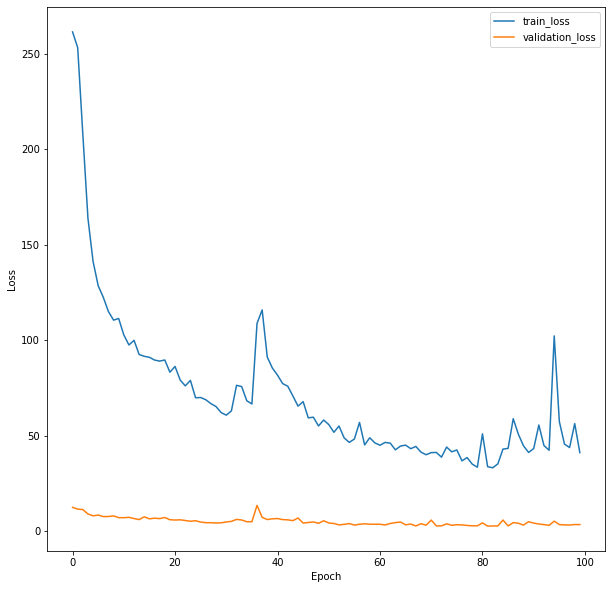

In [31]:
Anomaly_Classifier(input_size=1,num_classes= 5).cuda().apply(reset_weights)
print('Weights Reset')
anom_classifier= Anomaly_Classifier(input_size=1,num_classes= 5).cuda()
criterion = nn.NLLLoss()
optimizer = optim.Adam(anom_classifier.parameters(),lr = 0.001) 
trained_classifier2 = train_model(data_loader=dataloader, model=anom_classifier, criterion = criterion,optimizer = optimizer ,
                                            n_epochs=100,print_every=10,verbose=True,plot_results=True, validation=True)
preds,truth = evaluate(testloader=testloader, trained_model = trained_classifier2,verbose=True)

Normalized confusion matrix


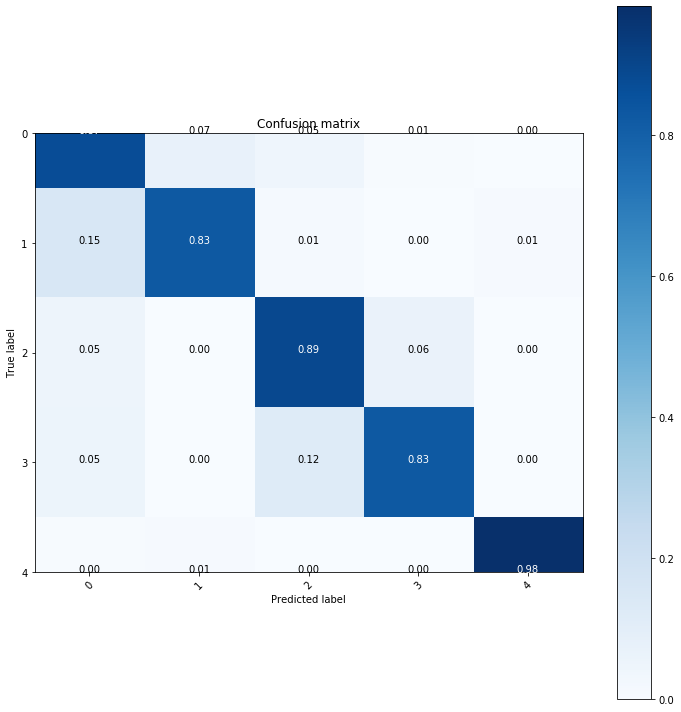

In [32]:
cm = confusion_matrix(y_true=truth, y_pred=preds)
plot_confusion_matrix(cm=cm,normalize=True,classes=classes)

In [33]:
preds,truth = evaluate(testloader=testloader, trained_model = trained_classifier2,verbose=True)

torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.Size([512])
torch.Size([512, 1, 187])
torch.

In [34]:
# model save
path = '/Users/Xing/code/medlink_ecg/ECG_Classification_Pytorch/torch_train/model_20200107.pkl'
torch.save(trained_classifier2,path)

/home/ps/anaconda3/envs/torch-env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Anomaly_Classifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ps/anaconda3/envs/torch-env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv1d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ps/anaconda3/envs/torch-env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ps/anaconda3/envs/torch-env/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MaxPool1d. It won't be checked for co

In [35]:
model_test = torch.load(path)

In [36]:
model_test

Anomaly_Classifier(
  (conv): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
  (conv_pad): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (drop_50): Dropout(p=0.5, inplace=False)
  (maxpool): MaxPool1d(kernel_size=5, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dense2): Linear(in_features=32, out_features=32, bias=True)
  (dense_final): Linear(in_features=32, out_features=5, bias=True)
  (softmax): LogSoftmax()
  (dense): Linear(in_features=256, out_features=32, bias=True)
)

In [42]:
X

array([[0.58072289, 0.58554217, 0.58795181, ..., 0.        , 0.        ,
        0.        ],
       [0.59156627, 0.58795181, 0.58674699, ..., 0.        , 0.        ,
        0.        ],
       [0.57951807, 0.58313253, 0.58433735, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47031963, 0.47123288, 0.47214612, ..., 0.        , 0.        ,
        0.        ],
       [0.44018265, 0.44109589, 0.44292237, ..., 0.        , 0.        ,
        0.        ],
       [0.43835616, 0.43652968, 0.43744292, ..., 0.        , 0.        ,
        0.        ]])

In [49]:
X_t = torch.from_numpy(X)
X_t = X_t[:100,:]
shapex,shapey = X_t.size()
X_t = X_t.reshape(100,1,539)
X_t

tensor([[[0.5807, 0.5855, 0.5880,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5916, 0.5880, 0.5867,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5795, 0.5831, 0.5843,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.5711, 0.5735, 0.5747,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5699, 0.5687, 0.5651,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5675, 0.5687, 0.5675,  ..., 0.0000, 0.0000, 0.0000]]],
       dtype=torch.float64)

In [50]:
shapex,shapey

(100, 539)

In [105]:
model_test.eval()

Anomaly_Classifier(
  (conv): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
  (conv_pad): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (drop_50): Dropout(p=0.5, inplace=False)
  (maxpool): MaxPool1d(kernel_size=5, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dense1): Linear(in_features=256, out_features=32, bias=True)
  (dense2): Linear(in_features=32, out_features=32, bias=True)
  (dense_final): Linear(in_features=32, out_features=5, bias=True)
  (softmax): LogSoftmax()
  (dense): Linear(in_features=960, out_features=32, bias=True)
)

In [119]:
y = model_test(X_t.type(torch.FloatTensor).cuda())

In [120]:
# torch.max(,0),返回最大值，torch.max(,1),返回最大值的索引
_, predicted = torch.max(y, 1) 

In [121]:
predicted

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')

In [100]:
tt = predicted.cpu().numpy()

In [101]:
cc = np.where(tt==3)

In [102]:
np.random.choice(cc[0])

0

In [103]:
predicted.shape

torch.Size([100])

In [104]:
predicted.reshape(10,10)

tensor([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
        [3, 0, 3, 0, 0, 3, 0, 0, 3, 0],
        [0, 3, 3, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')

In [82]:
predicted.reshape(10,1,10)

tensor([[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 3, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[3, 0, 0, 3, 3, 3, 0, 0, 0, 0]],

        [[0, 0, 3, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]], device='cuda:0')